In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
observations = pd.read_csv("data/observations_train.csv")
series = pd.read_csv("data/series.csv")
series.head()

,series_id,name,frequency,units,seasonal_adjustment,Description
0,AAA10Y,Moodys Seasoned Aaa Corporate Bond Yield Relat...,Daily,Percent,Not Seasonally Adjusted,Series is calculated as the spread between Moo...
1,ASEANTOT,Import Price Index: ASEAN - All commodities,Monthly,Index Dec 2003=100,Not Seasonally Adjusted,"For more information, please see the Import/Ex..."
2,BAA10Y,Moodys Seasoned Baa Corporate Bond Yield Relat...,Daily,Percent,Not Seasonally Adjusted,Series is calculated as the spread between Moo...
3,BUSAPPWNSAUS,Business Applications for the United States,"Weekly, Ending Saturday",Number,Not Seasonally Adjusted,Business Applications (BA): The core business ...
4,BUSAPPWNSAUSYY,Business Applications for the United States,"Weekly, Ending Saturday",Percent Change from Year Ago,Not Seasonally Adjusted,Business Applications (BA): The core business ...


In [3]:
series.groupby("seasonal_adjustment").count()

,series_id,name,frequency,units,Description
seasonal_adjustment,,,,,
Not Seasonally Adjusted,52,52,52,52,36
Seasonally Adjusted,19,19,19,19,4


In [4]:
series.query("""seasonal_adjustment == 'Seasonally Adjusted'  """)

,series_id,name,frequency,units,seasonal_adjustment,Description
24,GVIPT50002S,Gross Value Weighted Industrial Production: Fi...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
25,GVIPT50030S,Gross Value Weighted Industrial Production: Fi...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
26,GVIPT51000S,Gross Value Weighted Industrial Production: Co...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
27,GVIPT51100S,Gross Value Weighted Industrial Production: Du...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
28,GVIPT51110S,Gross Value Weighted Industrial Production: Au...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
29,GVIPT51120S,Gross Value Weighted Industrial Production: Ot...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
30,GVIPT51200S,Gross Value Weighted Industrial Production: No...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
31,GVIPT52000S,Gross Value Weighted Industrial Production: Eq...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
32,GVIPT52100S,Gross Value Weighted Industrial Production: Bu...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN
33,GVIPT521A3S,Gross Value Weighted Industrial Production: Bu...,Monthly,Billions of 2012 US Dollars,Seasonally Adjusted,NaN


In [5]:
observations.head()

,series_id,date,value
0,AAA10Y,2000-01-03 00:00:00.0000000,1.17
1,AAA10Y,2000-01-04 00:00:00.0000000,1.20
2,AAA10Y,2000-01-05 00:00:00.0000000,1.16
3,AAA10Y,2000-01-06 00:00:00.0000000,1.15
4,AAA10Y,2000-01-07 00:00:00.0000000,1.17


In [6]:
observations['date'] = pd.to_datetime(observations['date'])
obs = observations.pivot_table(values="value", index="date", columns="series_id")

In [7]:
SP500 = obs['SP500']
SP500.dropna(inplace=True)
SP500.head()

date
2011-02-14    1332.32
2011-02-15    1328.01
2011-02-16    1336.32
2011-02-17    1340.43
2011-02-18    1343.01
Name: SP500, dtype: float64

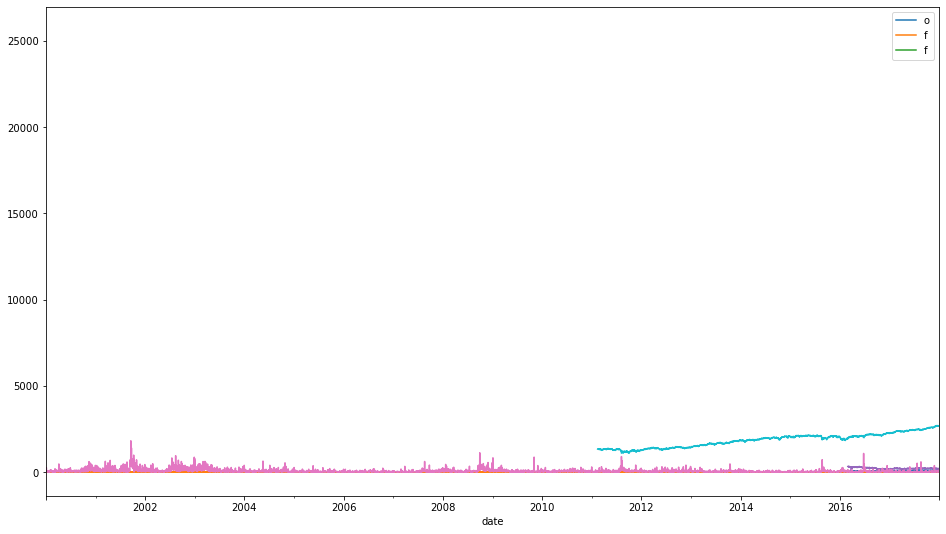

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))
obs.drop(columns=["BUSAPPWNSAUS"]).plot(ax=ax)
ax.legend("off")
# ax.set_ylim([0, 10_000])

In [9]:
obs.max()

series_id
AAA10Y                3.000
ASEANTOT            106.200
BAA10Y                6.160
BUSAPPWNSAUS      85450.000
BUSAPPWNSAUSYY      687.950
                    ...    
TLAACBW027NBOG    16841.372
TLBACBW027NBOG    14989.244
TSIFRGHT            133.600
UNRATE               10.000
WLEMUINDXD         1811.330
Length: 68, dtype: float64

<AxesSubplot:xlabel='date'>

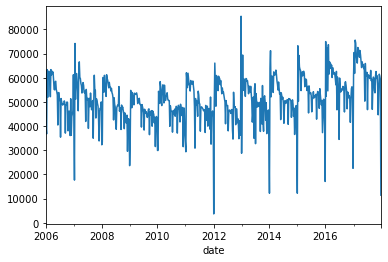

In [10]:
series.query("""series_id == 'BUSAPPWNSAUS'""")
obs['BUSAPPWNSAUS'].dropna().plot()

Normalize Values

In [11]:
normalize = lambda col: (col-col.mean())/col.std()

normed_obs = obs.apply(normalize, axis=0)

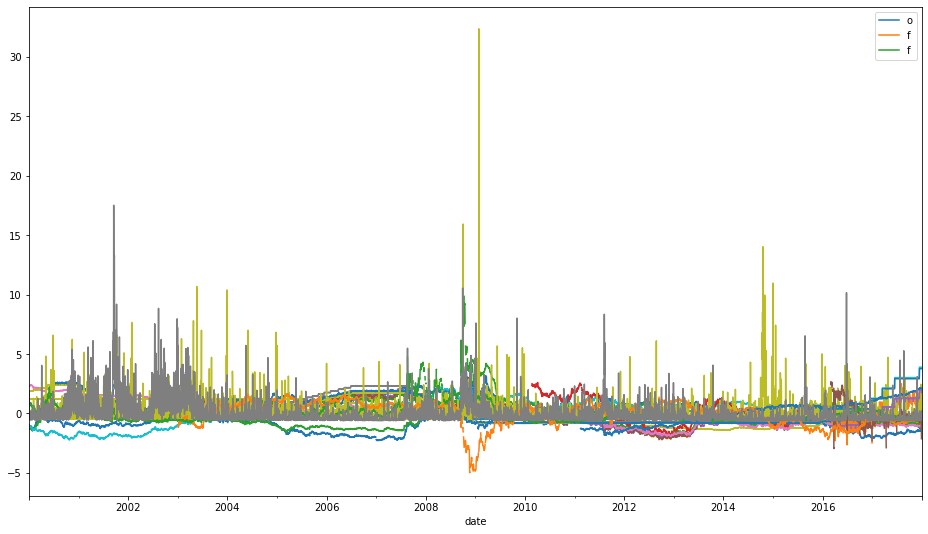

In [12]:
fig, ax = plt.subplots(figsize=(16, 9))
normed_obs.plot(ax=ax)
ax.legend("off")

In [13]:
normed_obs.corr()['SP500']

series_id
AAA10Y           -0.702341
ASEANTOT         -0.845046
BAA10Y           -0.640168
BUSAPPWNSAUS           NaN
BUSAPPWNSAUSYY         NaN
                    ...   
TLAACBW027NBOG    0.972114
TLBACBW027NBOG    0.971807
TSIFRGHT          0.968472
UNRATE           -0.964499
WLEMUINDXD       -0.204052
Name: SP500, Length: 68, dtype: float64

In [14]:
series.query("""series_id == 'UNRATE'""")

,series_id,name,frequency,units,seasonal_adjustment,Description
69,UNRATE,Unemployment Rate,Monthly,Percent,Seasonally Adjusted,The unemployment rate represents the number of...


In [15]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [16]:
m = Prophet()

features = pd.DataFrame({'ds': normed_obs.index, 'y': normed_obs['SP500'], 'unem': normed_obs['UNRATE']})
features = features.loc[features.index >= '2011-02-14']

In [17]:
features['unem'] = features['unem'].fillna(method='ffill')
features = features.loc[features.index >= '2011-03-01']
features

,ds,y,unem
date,,,
2011-03-01,2011-03-01,-1.349348,1.637112
2011-03-02,2011-03-02,-1.344029,1.637112
2011-03-03,2011-03-03,-1.287236,1.637112
2011-03-04,2011-03-04,-1.311990,1.637112
2011-03-05,2011-03-05,NaN,1.637112
...,...,...,...
2017-12-27,2017-12-27,2.119963,-1.151405
2017-12-28,2017-12-28,2.132365,-1.151405
2017-12-29,2017-12-29,2.097250,-1.151405


In [18]:
m.add_regressor("unem", standardize=False)
train = features.iloc[:-200]
test = features.iloc[-200:]
train

,ds,y,unem
date,,,
2011-03-01,2011-03-01,-1.349348,1.637112
2011-03-02,2011-03-02,-1.344029,1.637112
2011-03-03,2011-03-03,-1.287236,1.637112
2011-03-04,2011-03-04,-1.311990,1.637112
2011-03-05,2011-03-05,NaN,1.637112
...,...,...,...
2017-06-10,2017-06-10,NaN,-1.037588
2017-06-11,2017-06-11,NaN,-1.037588
2017-06-12,2017-06-12,1.481628,-1.037588


In [19]:
m.fit(features)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = m.make_future_dataframe(periods=200)
future

,ds
0,2011-03-01
1,2011-03-02
2,2011-03-03
3,2011-03-04
4,2011-03-05
...,...
2693,2018-07-15
2694,2018-07-16
2695,2018-07-17
2696,2018-07-18


In [21]:
# future.set_index("ds", inplace=True)
future['unem'] = features['unem']
future.reset_index(inplace=True)

In [22]:
future.tail()

,index,ds,unem
2693,2693,2018-07-15,NaN
2694,2694,2018-07-16,NaN
2695,2695,2018-07-17,NaN
2696,2696,2018-07-18,NaN
2697,2697,2018-07-19,NaN


In [23]:
forecast = m.predict(future)

ValueError: Found NaN in column 'unem'

In [ ]:
forecast.set_index("ds", inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
forecast['yhat'].plot(ax=ax)
features['y'].plot(ax=ax)

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

test_obs = pd.read_csv("data/observations_test.csv")
test_unem = normalize(test_obs.query("""series_id == 'UNRATE'""").set_index("date"))['value']

ticker = yf.Ticker("SPY")
hist = ticker.history(start="2018-01-02",  end="2020-04-01")

In [ ]:
hist['Close'].plot()

In [ ]:
test_unem.index = pd.to_datetime(test_unem.index)
test_unem

In [ ]:
future2 = m.make_future_dataframe(periods=822)

In [ ]:
future2.set_index("ds", inplace=True)
future2.tail()

In [ ]:
future2['unem'] = features['unem'].append(test_unem)
future2['unem'] = future2['unem'].fillna(method='bfill')
future2.tail()

In [ ]:
future2.reset_index(inplace=True)

In [ ]:
future2

In [ ]:
forecastback = m.predict(future2)

In [ ]:
forecastback

In [ ]:
full_sp500 = ticker.history(start="2011-03-01",  end="2020-04-01")

In [ ]:
fig,ax = plt.subplots(figsize=(16, 9))
forecastback[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].plot("ds", ax=ax)
normalize(full_sp500['Close']).plot(ax=ax)
# ax.set_xlim(['2020-02-01', '2020-04-01'])

Adding infectious diseases

In [ ]:
series.loc[series.name.str.contains("Disease")]

In [ ]:
normed_obs['INFECTDISEMVTRACKD'].plot()

In [ ]:
corona = test_obs.query("""series_id == 'INFECTDISEMVTRACKD'""")
corona.set_index(pd.to_datetime(corona.date), inplace=True)
corona['value'].plot()
corona

In [ ]:
m2 = Prophet()

In [ ]:
m2.add_regressor("unem", standardize=False)
m2.add_regressor("infect", standardize=False)

features['infect'] = normed_obs['INFECTDISEMVTRACKD']
features

In [ ]:
m2.fit(features)

In [ ]:
future3 = future2.copy(deep=True)
future3.set_index("ds", inplace=True)
raw_infect = observations.query("""series_id == 'INFECTDISEMVTRACKD'""")
raw_infect.set_index(pd.to_datetime(raw_infect.date), inplace=True)
raw_infect

In [ ]:
future3['infect'] = raw_infect['value'].append(corona['value'])
future3.reset_index(inplace=True)
future3['infect'].fillna(method='ffill', inplace=True)
future3.head()

In [ ]:
future3.query("infect != infect")

In [ ]:
forecast3 = m2.predict(future3)
forecast3

In [ ]:
fig,ax = plt.subplots(figsize=(16, 9))
forecast3[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].plot("ds", ax=ax)
normalize(full_sp500['Close']).plot(ax=ax)

In [297]:
series.series_id.unique()

array(['AAA10Y', 'ASEANTOT', 'BAA10Y', 'BUSAPPWNSAUS', 'BUSAPPWNSAUSYY',
       'CBUSAPPWNSAUS', 'CBUSAPPWNSAUSYY', 'CUUR0000SA0R', 'DEXCHUS',
       'DEXJPUS', 'DEXUSEU', 'DEXUSUK', 'DFII10', 'DFII20', 'DFII30',
       'DFII5', 'DFII7', 'DLTIIT', 'DPCREDIT', 'DPRIME', 'EECTOT', 'EFFR',
       'EFFRVOL', 'FRGSHPUSM649NCIS', 'GVIPT50002S', 'GVIPT50030S',
       'GVIPT51000S', 'GVIPT51100S', 'GVIPT51110S', 'GVIPT51120S',
       'GVIPT51200S', 'GVIPT52000S', 'GVIPT52100S', 'GVIPT521A3S',
       'GVIPT52300S', 'GVIPT54000S', 'GVIPT54100S', 'GVIPT54200S',
       'GVIPT54220S', 'INFECTDISEMVTRACKD', 'IOER', 'IORR',
       'MEDCPIM158SFRBCLE', 'MORTGAGE15US', 'MORTGAGE30US', 'OBFR',
       'OBFRVOL', 'PCUADLVWRADLVWR', 'PCUAINFOAINFO', 'PCUAMUMAMUM',
       'PCUARETTRARETTR', 'PCUASHCASHC', 'PCUASTDSVASTDSV',
       'PCUATRADEATRADE', 'PCUATRANSATRANS', 'PCUATRNWRATRNWR',
       'PCUATTDSVATTDSV', 'PCUAWHLTRAWHLTR', 'PCUOMFGOMFG', 'PCUOMINOMIN',
       'SFTPAGRM158SFRBSF', 'SOFR', 'SOFRVOL', 